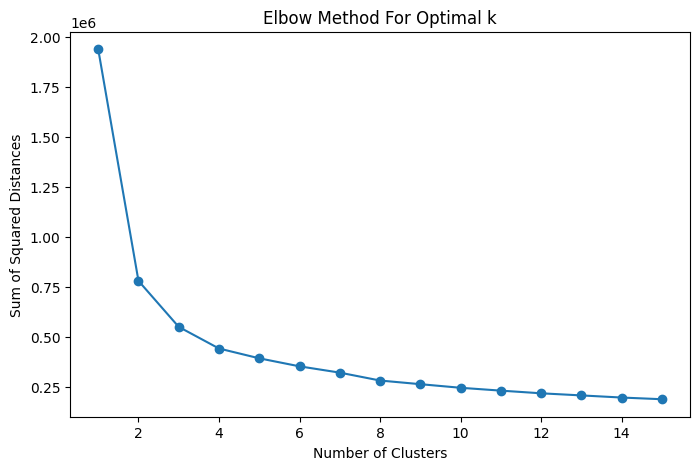

Silhouette Score for KMeans: 0.4872856919870206
Silhouette Score for Agglomerative Clustering: 0.45970229206007024


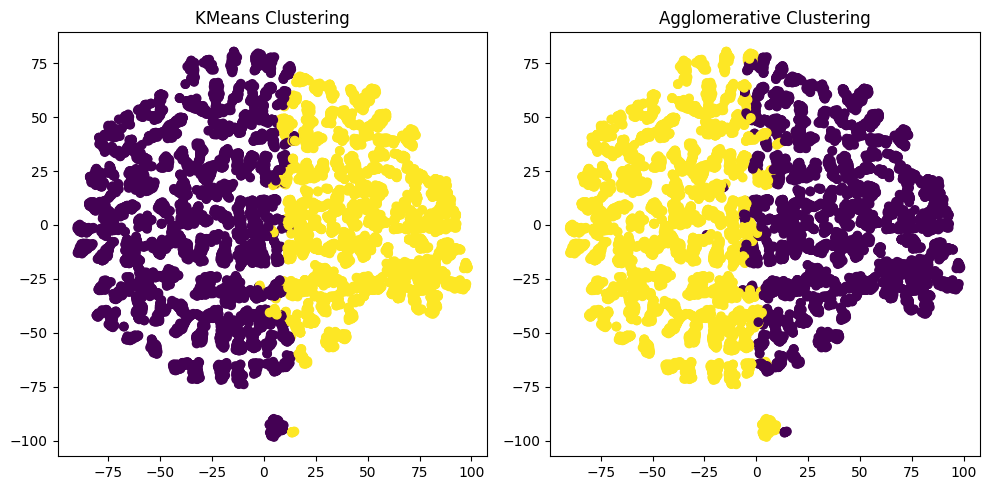

In [41]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


def load_data(path):
    """Load data from a parquet file."""
    parquet_table = pq.read_table(path)
    return parquet_table.to_pandas()

def perform_pca(data, n_components=0.95):
    """Perform PCA on the data."""
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

def find_optimal_clusters(data, max_k=15):
    """Determine the optimal number of clusters using the elbow method."""
    inertia = []
    possible_k_values = range(1, max_k + 1)
    
    for k in possible_k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        inertia.append(kmeans.inertia_)
    
    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(possible_k_values, inertia, '-o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

def cluster_data(data, n_clusters=2):
    """Cluster data using KMeans and Agglomerative Clustering."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    
    labels_kmeans = kmeans.fit_predict(data)
    labels_agg = agg_clustering.fit_predict(data)
    
    return labels_kmeans, labels_agg

def visualize_clusters(data, labels_kmeans, labels_agg):
    """Visualize the clusters using t-SNE."""
    tsne = TSNE(n_components=2, random_state=42)
    data_tsne = tsne.fit_transform(data)

    plt.figure(figsize=(10, 5))

    # KMeans visualization
    plt.subplot(1, 2, 1)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_kmeans, cmap='viridis')
    plt.title('KMeans Clustering')

    # Agglomerative Clustering visualization
    plt.subplot(1, 2, 2)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_agg, cmap='viridis')
    plt.title('Agglomerative Clustering')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Load the data
    df = load_data(r"X:\DS\NYC MLOPS\data\transformed\X\fhvhv_tripdata_2023-01.parquet")

    # Sample the data
    data_sample = df.sample(n=10000, random_state=42)

    # Perform PCA
    data_pca_sample = perform_pca(data_sample)

    # Determine optimal clusters
    find_optimal_clusters(data_pca_sample)

    # Cluster data
    labels_kmeans, labels_agg = cluster_data(data_pca_sample, n_clusters=2)

    # Print silhouette scores
    silhouette_kmeans = silhouette_score(data_pca_sample, labels_kmeans)
    silhouette_agg = silhouette_score(data_pca_sample, labels_agg)
    print(f"Silhouette Score for KMeans: {silhouette_kmeans}")
    print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agg}")

    # Visualize clusters
    visualize_clusters(data_pca_sample, labels_kmeans, labels_agg)


In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

In [2]:
df=pq.read_table(r"X:\DS\NYC MLOPS\data\feature_engineered\fhvhv_tripdata_2023-01.parquet").to_pandas()

In [3]:
df=pd.DataFrame(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239768 entries, 0 to 239767
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   trip_miles               239768 non-null  float64 
 1   trip_time                239768 non-null  float64 
 2   driver_pay               239768 non-null  float64 
 3   access_a_ride_flag       239768 non-null  object  
 4   request_datetime_hour    239768 non-null  int32   
 5   request_datetime_day     239768 non-null  category
 6   request_datetime_month   239768 non-null  category
 7   duration_minutes         239768 non-null  float64 
 8   wait_time_minutes        239768 non-null  float64 
 9   service_time_minutes     239768 non-null  float64 
 10  on_scene_datetime_hour   239768 non-null  int32   
 11  on_scene_datetime_day    239768 non-null  category
 12  on_scene_datetime_month  239768 non-null  category
 13  pickup_datetime_hour     239768 non-null  in

In [4]:
r=df.head(1).to_json(indent=4)

In [5]:
print(r)

{
    "trip_miles":{
        "0":2.71
    },
    "trip_time":{
        "0":796.0
    },
    "driver_pay":{
        "0":19.16
    },
    "access_a_ride_flag":{
        "0":" "
    },
    "request_datetime_hour":{
        "0":11
    },
    "request_datetime_day":{
        "0":"Friday"
    },
    "request_datetime_month":{
        "0":"January"
    },
    "duration_minutes":{
        "0":13.2666666667
    },
    "wait_time_minutes":{
        "0":1.3833333333
    },
    "service_time_minutes":{
        "0":16.3666666667
    },
    "on_scene_datetime_hour":{
        "0":11
    },
    "on_scene_datetime_day":{
        "0":"Friday"
    },
    "on_scene_datetime_month":{
        "0":"January"
    },
    "pickup_datetime_hour":{
        "0":11
    },
    "pickup_datetime_day":{
        "0":"Friday"
    },
    "pickup_datetime_month":{
        "0":"January"
    },
    "dropoff_datetime_hour":{
        "0":11
    },
    "dropoff_datetime_day":{
        "0":"Friday"
    },
    "dropoff_datetime_mo

In [6]:
df.iloc[0].to_dict()

{'trip_miles': 2.71,
 'trip_time': 796.0,
 'driver_pay': 19.16,
 'access_a_ride_flag': ' ',
 'request_datetime_hour': 11,
 'request_datetime_day': 'Friday',
 'request_datetime_month': 'January',
 'duration_minutes': 13.266666666666667,
 'wait_time_minutes': 1.3833333333333333,
 'service_time_minutes': 16.366666666666667,
 'on_scene_datetime_hour': 11,
 'on_scene_datetime_day': 'Friday',
 'on_scene_datetime_month': 'January',
 'pickup_datetime_hour': 11,
 'pickup_datetime_day': 'Friday',
 'pickup_datetime_month': 'January',
 'dropoff_datetime_hour': 11,
 'dropoff_datetime_day': 'Friday',
 'dropoff_datetime_month': 'January',
 'average_speed': 0.20427135678391958}